In [1]:
%matplotlib widget

from PIL import Image
import cv2 
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact, HBox

import os
import sys
# sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))
# os.path.abspath(os.path.join('..')
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from cv2 import aruco
    
from scripts.util import extract_laser, undistort_camera

In [2]:
import glob, os

aruco_samples = []
os.chdir("../res/pose_samples/charuco/tests/sweep")
for file in sorted(glob.glob("*"), key=os.path.getmtime):
    aruco_samples.append(file)

In [45]:
def disp_file(path):
    # In OpenCV, images are in BGR
    # In Pillow, images are in RGB 
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
    img = cv2.resize(img, (480, 360))
    display(Image.fromarray(img))

# Display cv2 image
def disp_img(cv_img):
#     cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
    cv_img = cv2.resize(cv_img, (480, 360))
    display(Image.fromarray(cv_img))

0 charuco_laser_30.png


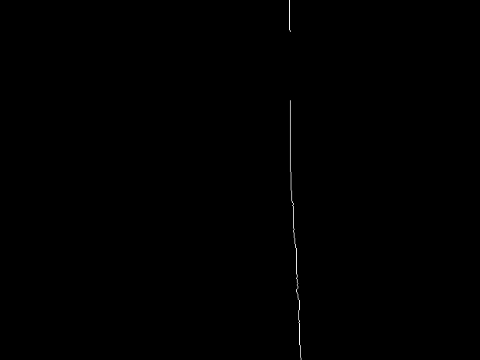

1 charuco_laser_31.png


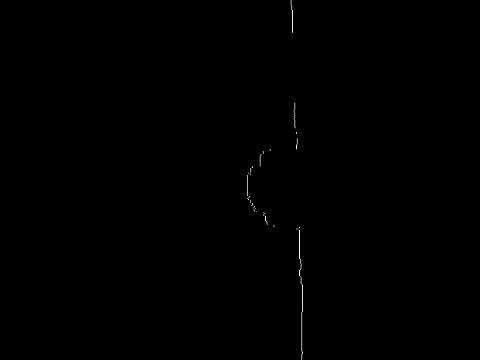

2 charuco_laser_32.png


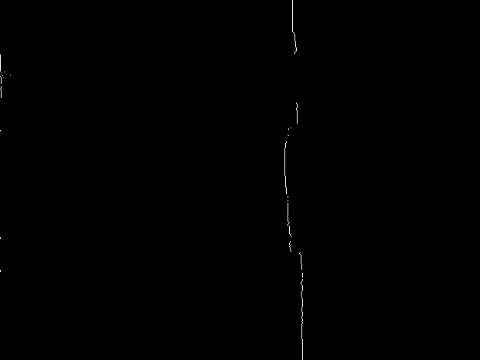

3 charuco_laser_33.png


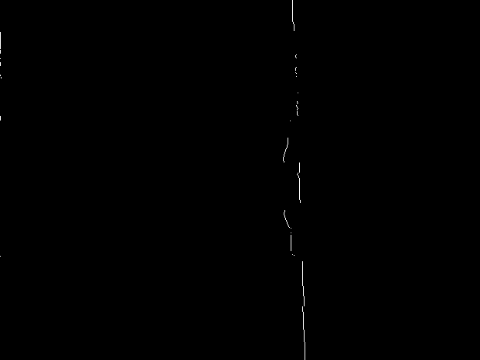

4 charuco_laser_34.png


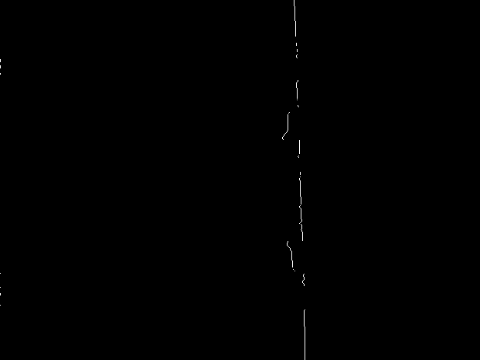

5 charuco_laser_35.png


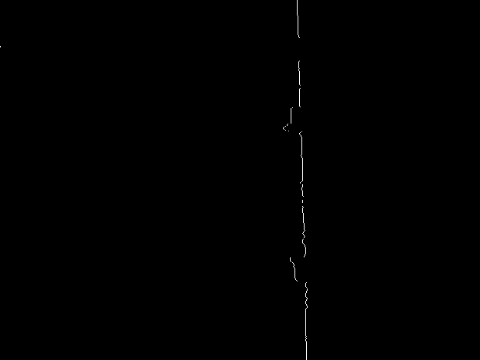

6 charuco_laser_36.png


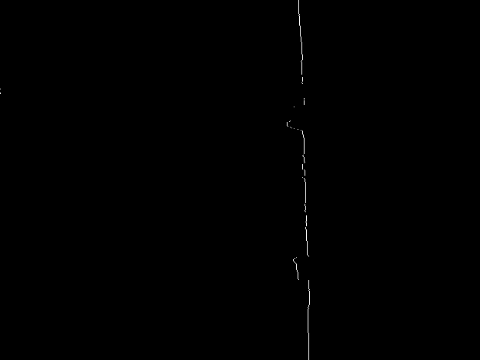

7 charuco_laser_37.png


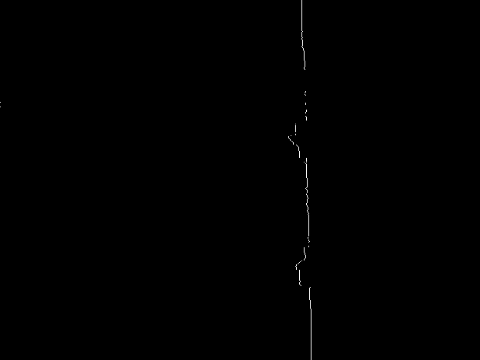

8 charuco_laser_38.png


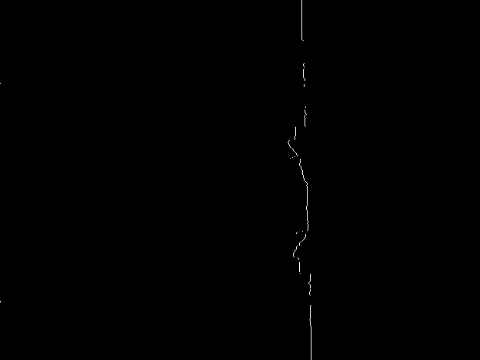

9 charuco_laser_39.png


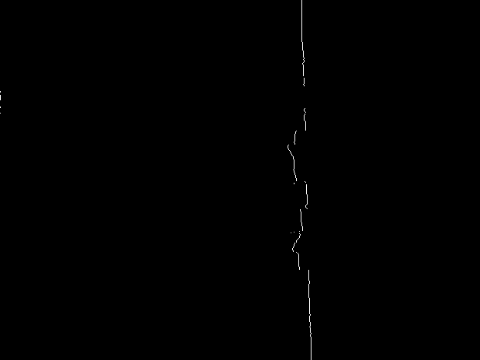

10 charuco_laser_40.png


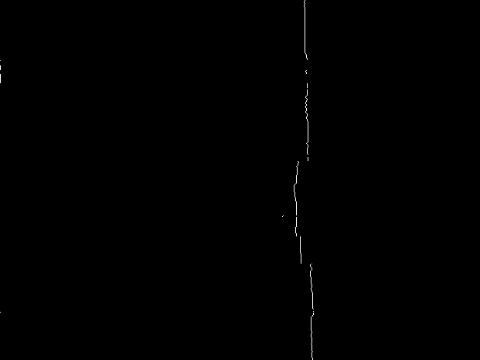

11 charuco_laser_41.png


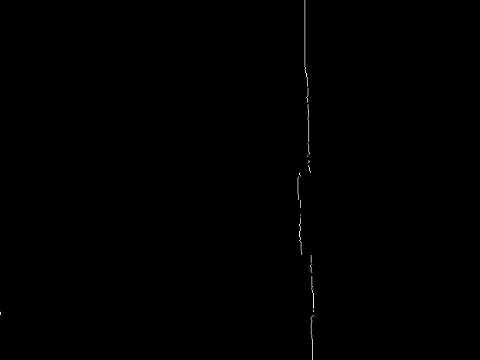

12 charuco_laser_42.png


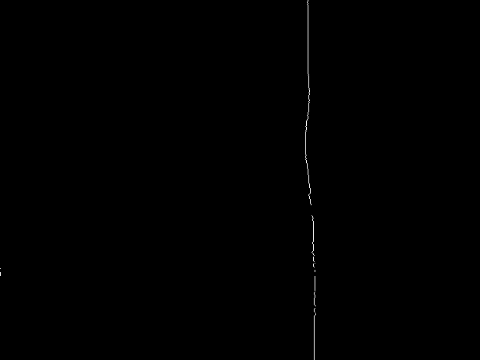

13 charuco_laser_43.png


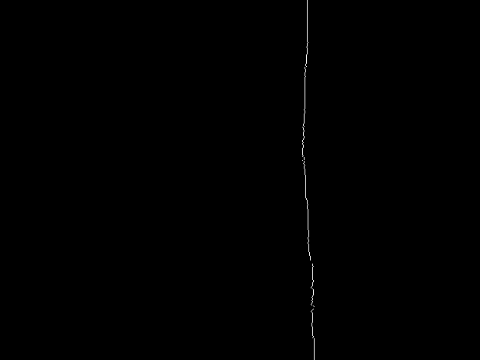

14 charuco_undist_30.png


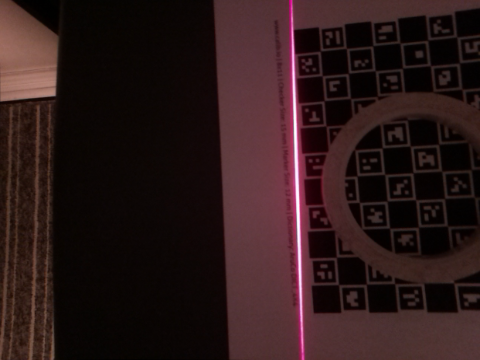

15 charuco_undist_31.png


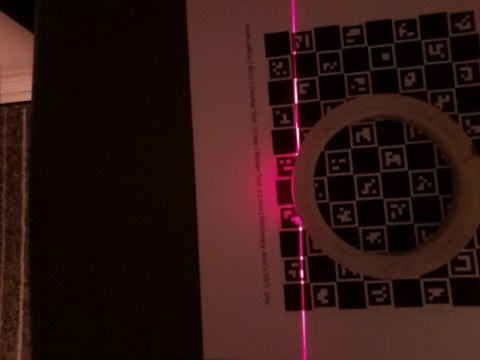

16 charuco_undist_32.png


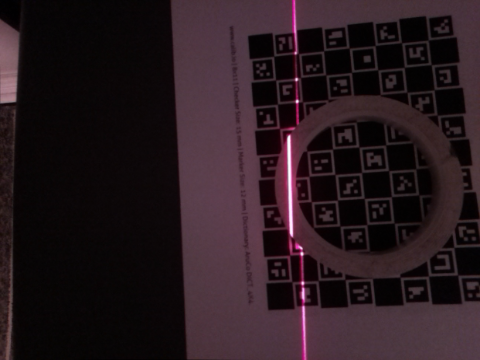

17 charuco_undist_33.png


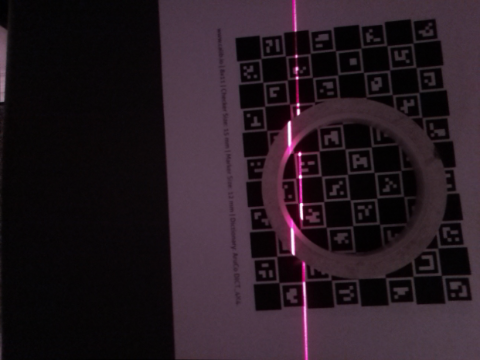

18 charuco_undist_34.png


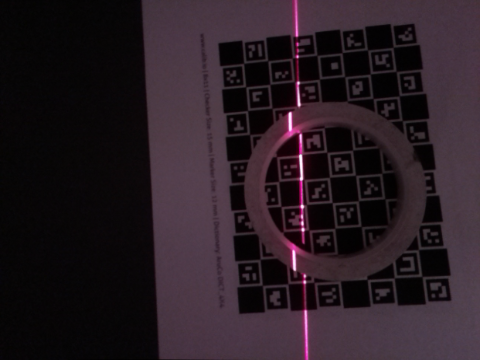

19 charuco_undist_35.png


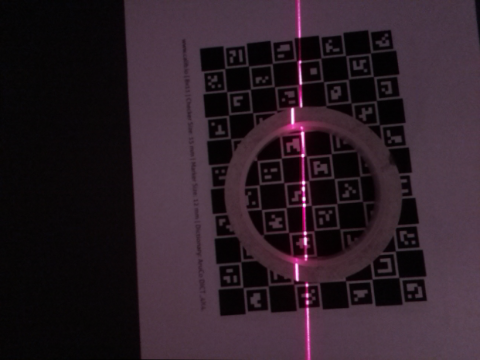

20 charuco_undist_36.png


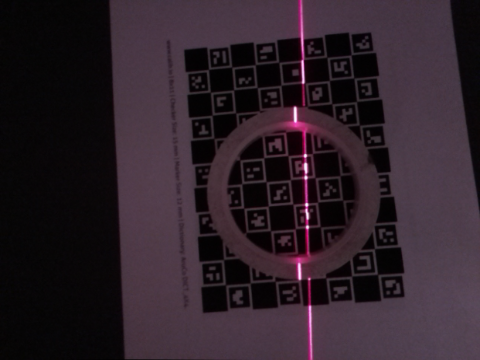

21 charuco_undist_37.png


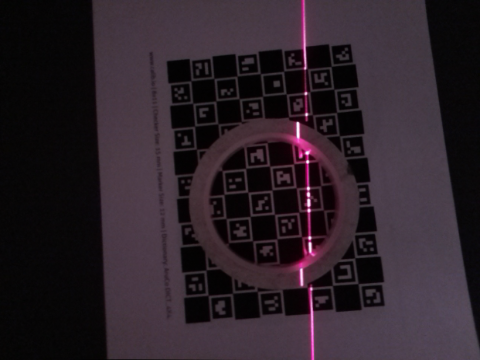

22 charuco_undist_38.png


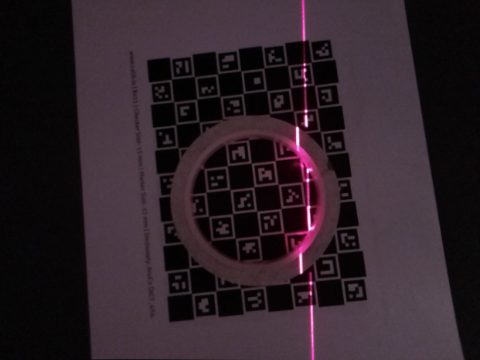

23 charuco_undist_39.png


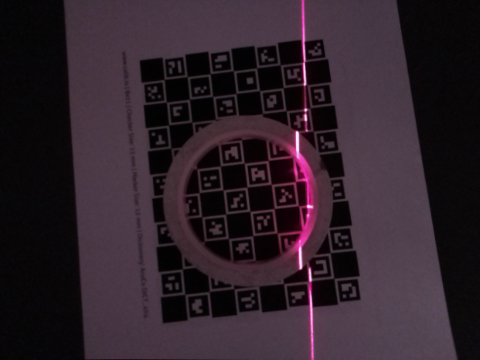

24 charuco_undist_40.png


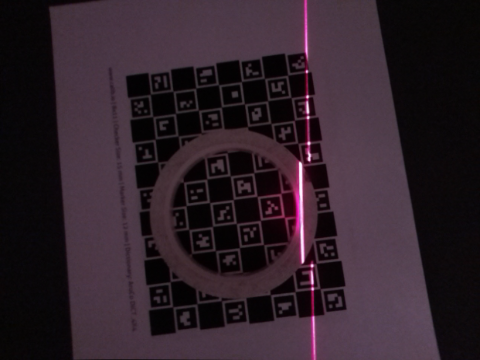

25 charuco_undist_41.png


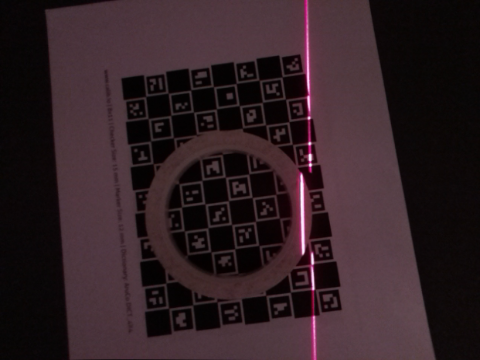

26 charuco_undist_42.png


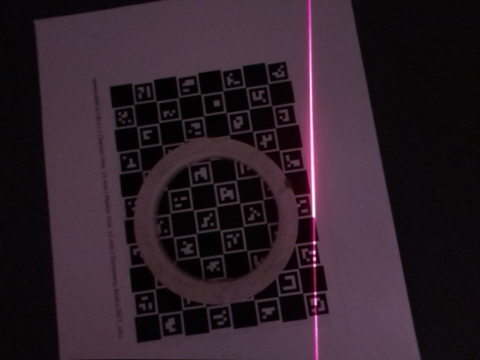

27 charuco_undist_43.png


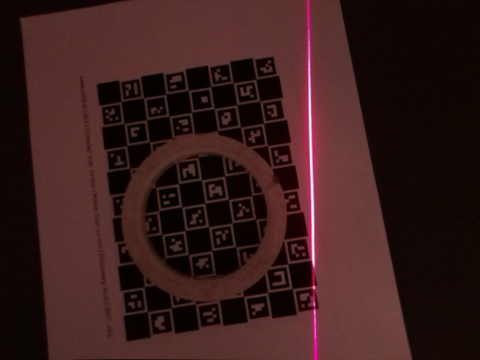

In [4]:
for idx, f in enumerate(aruco_samples):
    print(idx, f)
    disp_file(f)

In [5]:
import os 

os.getcwd()

'F:\\gitProjects\\CapstoneLaser\\res\\pose_samples\\charuco\\tests\\sweep'

In [6]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_250)
board = aruco.CharucoBoard_create(11, 8, 1.5, 1.2, aruco_dict)

In [7]:
import glob, os

charuco_samples = []
# os.chdir("res/pose_samples/charuco/")
for file in sorted(glob.glob("*"), key=os.path.getmtime):
    charuco_samples.append(file)

In [8]:
charuco_samples

['charuco_laser_30.png',
 'charuco_laser_31.png',
 'charuco_laser_32.png',
 'charuco_laser_33.png',
 'charuco_laser_34.png',
 'charuco_laser_35.png',
 'charuco_laser_36.png',
 'charuco_laser_37.png',
 'charuco_laser_38.png',
 'charuco_laser_39.png',
 'charuco_laser_40.png',
 'charuco_laser_41.png',
 'charuco_laser_42.png',
 'charuco_laser_43.png',
 'charuco_undist_30.png',
 'charuco_undist_31.png',
 'charuco_undist_32.png',
 'charuco_undist_33.png',
 'charuco_undist_34.png',
 'charuco_undist_35.png',
 'charuco_undist_36.png',
 'charuco_undist_37.png',
 'charuco_undist_38.png',
 'charuco_undist_39.png',
 'charuco_undist_40.png',
 'charuco_undist_41.png',
 'charuco_undist_42.png',
 'charuco_undist_43.png']

In [10]:
def read_chessboards(images):
    """
    Charuco base pose estimation.
    """
    print("POSE ESTIMATION STARTS:")
    allCorners = []
    allIds = []
    decimator = 0
    # SUB PIXEL CORNER DETECTION CRITERION
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.00001)

    for im in images:
        print("=> Processing image {0}".format(im))
        frame = cv2.imread(im)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(gray, aruco_dict)

        if len(corners)>0:
            # SUB PIXEL DETECTION
            for corner in corners:
                cv2.cornerSubPix(gray, corner,
                                 winSize = (3,3),
                                 zeroZone = (-1,-1),
                                 criteria = criteria)
            res2 = cv2.aruco.interpolateCornersCharuco(corners,ids,gray,board)
            if res2[1] is not None and res2[2] is not None and len(res2[1])>3 and decimator%1==0:
                allCorners.append(res2[1])
                allIds.append(res2[2])

        decimator+=1

    imsize = gray.shape
    return allCorners,allIds,imsize

In [11]:
allCorners,allIds,imsize=read_chessboards(charuco_samples)

POSE ESTIMATION STARTS:
=> Processing image charuco_laser_30.png
=> Processing image charuco_laser_31.png
=> Processing image charuco_laser_32.png
=> Processing image charuco_laser_33.png
=> Processing image charuco_laser_34.png
=> Processing image charuco_laser_35.png
=> Processing image charuco_laser_36.png
=> Processing image charuco_laser_37.png
=> Processing image charuco_laser_38.png
=> Processing image charuco_laser_39.png
=> Processing image charuco_laser_40.png
=> Processing image charuco_laser_41.png
=> Processing image charuco_laser_42.png
=> Processing image charuco_laser_43.png
=> Processing image charuco_undist_30.png
=> Processing image charuco_undist_31.png
=> Processing image charuco_undist_32.png
=> Processing image charuco_undist_33.png
=> Processing image charuco_undist_34.png
=> Processing image charuco_undist_35.png
=> Processing image charuco_undist_36.png
=> Processing image charuco_undist_37.png
=> Processing image charuco_undist_38.png
=> Processing image char

In [12]:
def calibrate_camera(allCorners,allIds,imsize):
    """
    Calibrates the camera using the dected corners.
    """
    print("CAMERA CALIBRATION")

    cameraMatrixInit = np.array([[ 1000.,    0., imsize[0]/2.],
                                 [    0., 1000., imsize[1]/2.],
                                 [    0.,    0.,           1.]])

    distCoeffsInit = np.zeros((5,1))
    flags = (cv2.CALIB_USE_INTRINSIC_GUESS + cv2.CALIB_RATIONAL_MODEL + cv2.CALIB_FIX_ASPECT_RATIO)
    #flags = (cv2.CALIB_RATIONAL_MODEL)
    (ret, camera_matrix, distortion_coefficients0,
     rotation_vectors, translation_vectors,
     stdDeviationsIntrinsics, stdDeviationsExtrinsics,
     perViewErrors) = cv2.aruco.calibrateCameraCharucoExtended(
                      charucoCorners=allCorners,
                      charucoIds=allIds,
                      board=board,
                      imageSize=imsize,
                      cameraMatrix=cameraMatrixInit,
                      distCoeffs=distCoeffsInit,
                      flags=flags,
                      criteria=(cv2.TERM_CRITERIA_EPS & cv2.TERM_CRITERIA_COUNT, 10000, 1e-9))

    return ret, camera_matrix, distortion_coefficients0, rotation_vectors, translation_vectors

In [13]:
%time ret, mtx, dist, rvecs, tvecs = calibrate_camera(allCorners,allIds,imsize)

CAMERA CALIBRATION
CPU times: total: 938 ms
Wall time: 938 ms


In [14]:
ret

0.5039208419876889

In [15]:
mtx

array([[477.60309908,   0.        , 288.81531002],
       [  0.        , 477.60309908, 244.72988784],
       [  0.        ,   0.        ,   1.        ]])

In [16]:
dist

array([[ 2.49175759e-01],
       [ 6.17780868e+00],
       [ 7.72508662e-03],
       [ 4.64377183e-04],
       [-1.08507757e+01],
       [ 2.13612762e-01],
       [ 6.17637382e+00],
       [-1.07920655e+01],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00]])

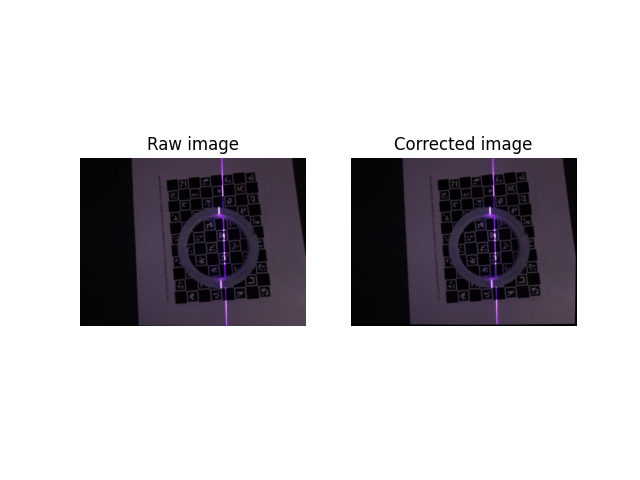

In [17]:
i=20 # select image id
plt.figure()
frame = cv2.imread(charuco_samples[i])
img_undist = cv2.undistort(frame,mtx,dist,None)
plt.subplot(1,2,1)
plt.imshow(frame)
plt.title("Raw image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(img_undist)
plt.title("Corrected image")
plt.axis("off")
plt.show()

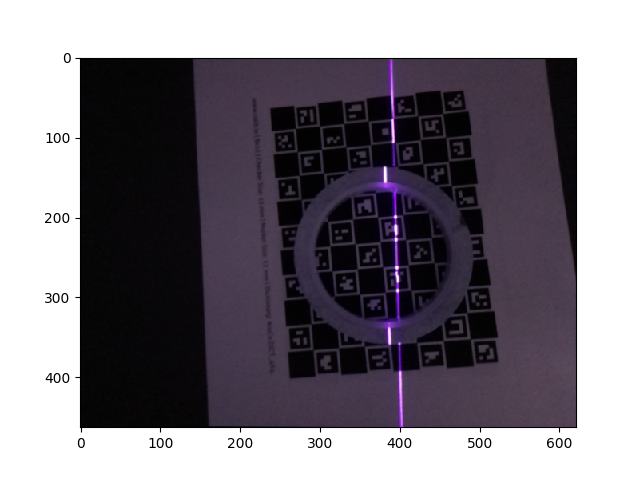

In [18]:
frame = cv2.imread(charuco_samples[20])
# frame = cv2.undistort(src = frame, cameraMatrix = mtx, distCoeffs = dist)
plt.figure()
plt.imshow(frame, interpolation = "nearest")
plt.show()


In [19]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_250)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict,
                                                      parameters=parameters)
# SUB PIXEL DETECTION
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.0001)
for corner in corners:
    cv2.cornerSubPix(gray, corner, winSize = (3,3), zeroZone = (-1,-1), criteria = criteria)

frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

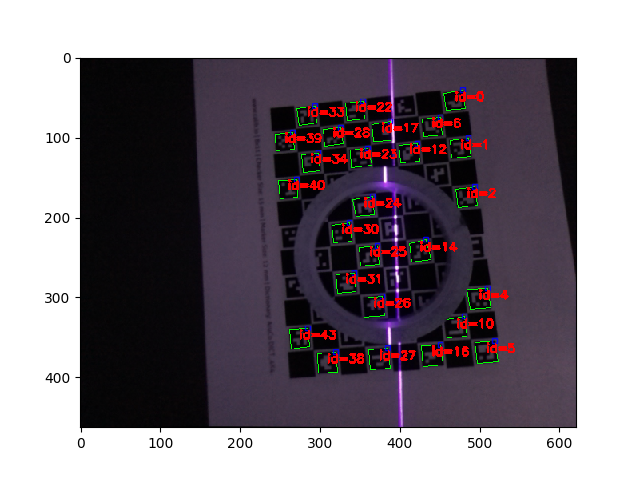

In [20]:
plt.figure()
plt.imshow(frame_markers, interpolation = "nearest")
plt.show()

In [21]:
empty_dist = np.array([0,0,0,0,0]).reshape(1,5)

In [22]:
charucoretval, charucoCorners, charucoIds = aruco.interpolateCornersCharuco(corners, ids, gray, board)

In [23]:
im_with_charuco_board = cv2.aruco.drawDetectedCornersCharuco(gray, charucoCorners, charucoIds, (0,255,0))

In [24]:
retval, rvec, tvec = cv2.aruco.estimatePoseCharucoBoard(charucoCorners, charucoIds, board, mtx, empty_dist, rvec = False, tvec = False)  # posture estimation from a charuco board

In [28]:
im_with_charuco_board = aruco.drawAxis(im_with_charuco_board, mtx, np.array([0.0,0.0,0.0,0.0,0.0]).reshape(1,5), rvec, tvec, 100)

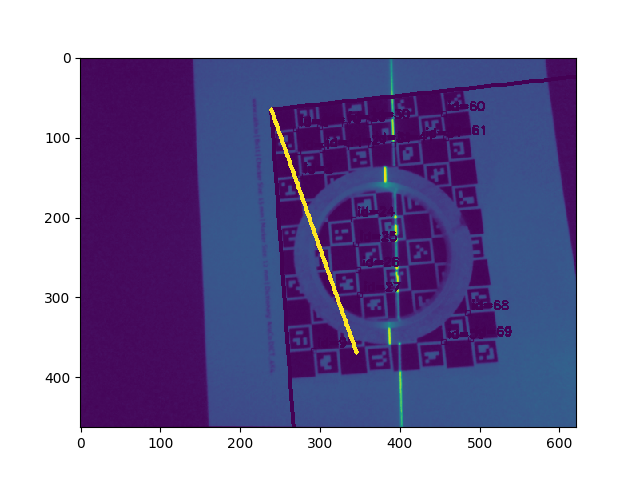

In [30]:
plt.figure()
plt.imshow(im_with_charuco_board, interpolation = "nearest")

plt.show()

## Test axis with calibrated camera params

In [31]:
# Load camera calibration data from cam_out folder
print(os.getcwd())

os.chdir("../../../../../")

with np.load('res/cal_out/cam_params.npz') as X:
    mtx, dist, rvecs, tvecs = [X[i] for i in ('mtx','dist','rvecs','tvecs')]

F:\gitProjects\CapstoneLaser\res\pose_samples\charuco\tests\sweep


In [32]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_250)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict,
                                                      parameters=parameters)
# SUB PIXEL DETECTION
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.0001)
for corner in corners:
    cv2.cornerSubPix(gray, corner, winSize = (3,3), zeroZone = (-1,-1), criteria = criteria)

frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

In [34]:
empty_dist = np.array([0,0,0,0,0]).reshape(1,5)

In [35]:
charucoretval, charucoCorners, charucoIds = aruco.interpolateCornersCharuco(corners, ids, gray, board)

In [36]:
im_with_charuco_board = cv2.aruco.drawDetectedCornersCharuco(gray, charucoCorners, charucoIds, (0,255,0))

In [37]:
retval, rvec, tvec = cv2.aruco.estimatePoseCharucoBoard(charucoCorners, charucoIds, board, mtx, empty_dist, rvec = False, tvec = False)  # posture estimation from a charuco board

In [38]:
im_with_charuco_board = aruco.drawAxis(im_with_charuco_board, mtx, np.array([0.0,0.0,0.0,0.0,0.0]).reshape(1,5), rvec, tvec, 100)

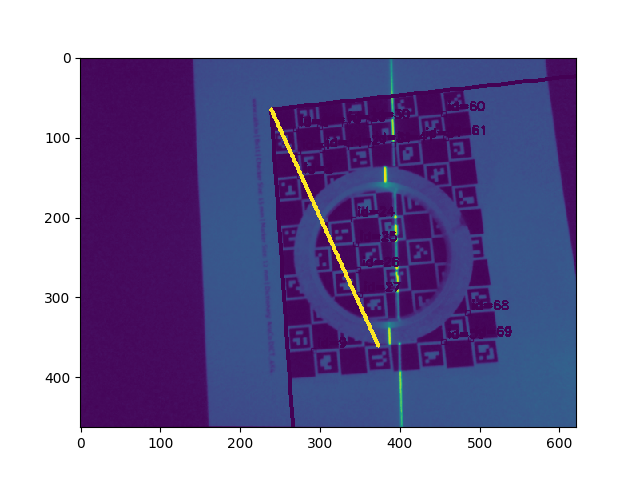

In [39]:
plt.figure()
plt.imshow(im_with_charuco_board, interpolation = "nearest")

plt.show()

## Test axis directions over multiple images

In [47]:
os.getcwd()

'F:\\gitProjects\\CapstoneLaser\\res\\pose_samples\\charuco\\tests\\sweep'

In [ ]:
os.chdir("res/pose_samples/charuco/tests/sweep")

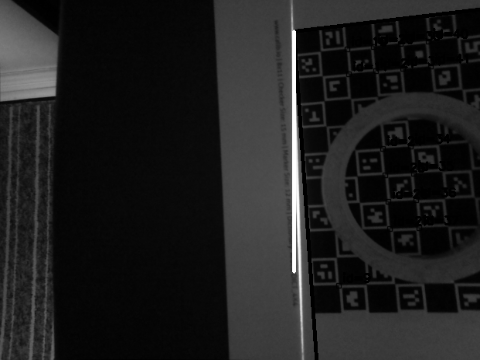

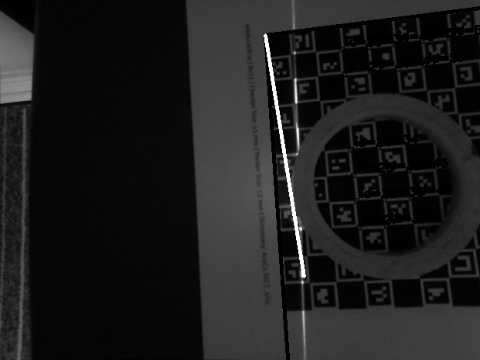

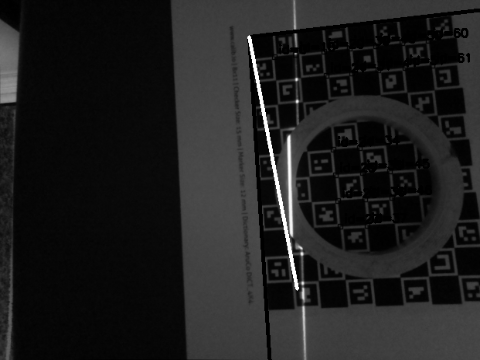

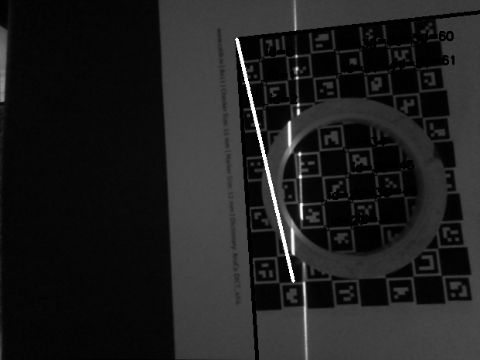

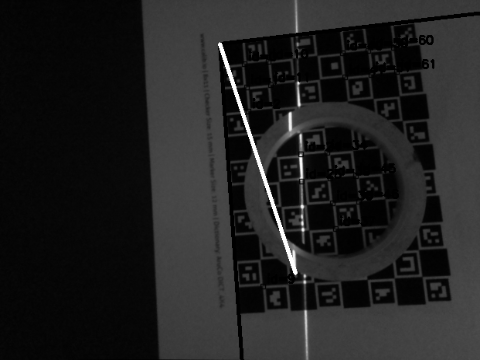

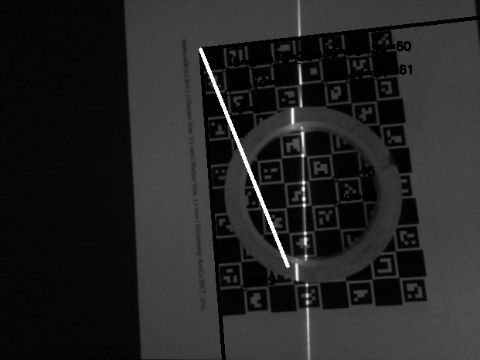

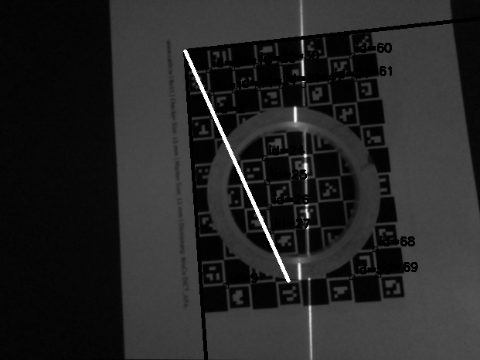

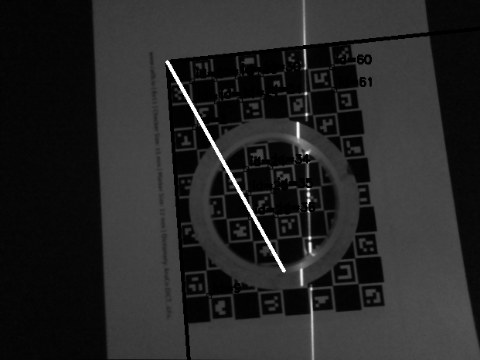

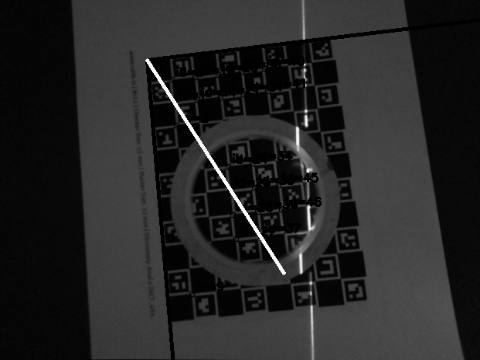

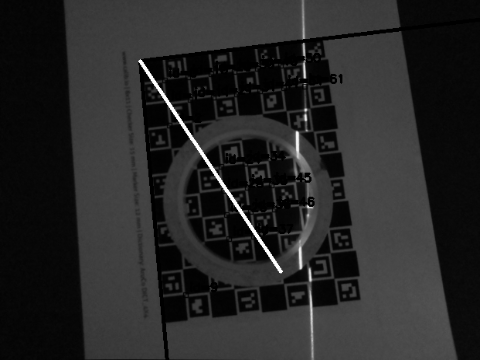

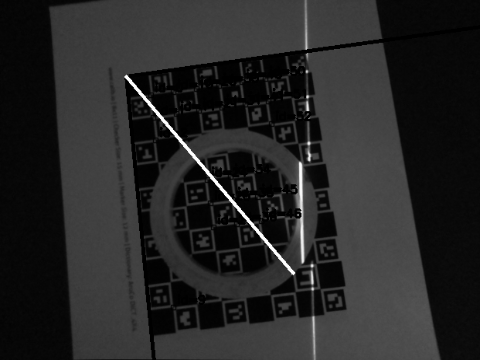

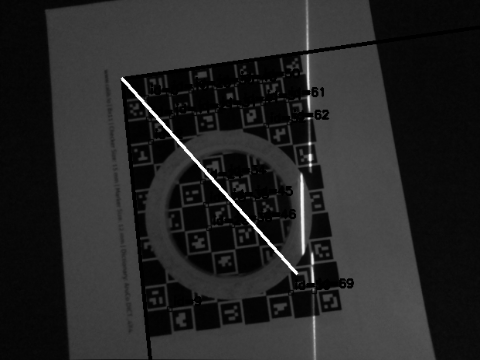

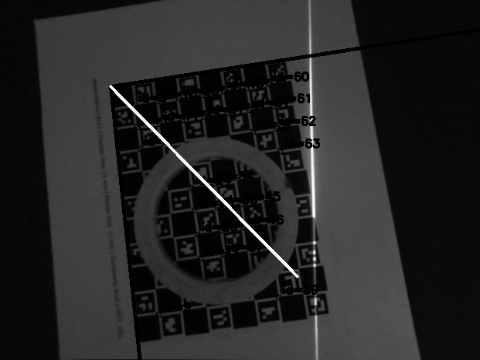

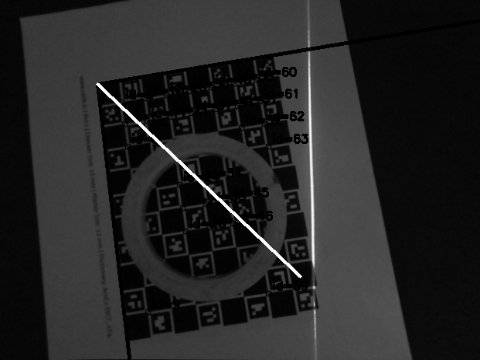

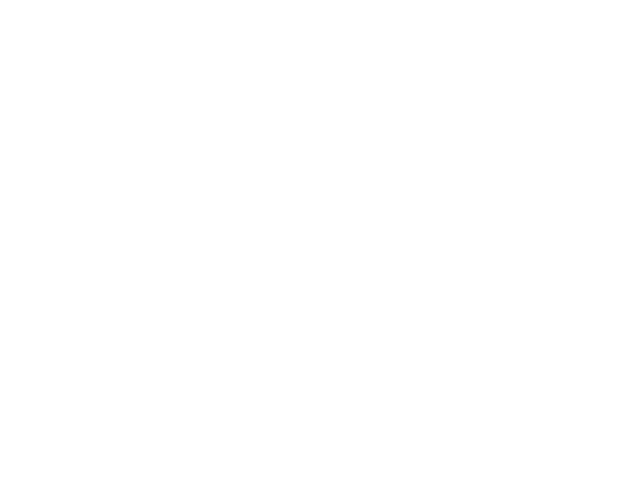

In [48]:


aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_250)
board = aruco.CharucoBoard_create(11, 8, 1.5, 1.2, aruco_dict)
parameters =  aruco.DetectorParameters_create()
plt.figure()

def print_axes(undist, aruco_dict, parameters, board, mtx):
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict,
                                                          parameters=parameters)
    # SUB PIXEL DETECTION
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.0001)
    for corner in corners:
        cv2.cornerSubPix(gray, corner, winSize = (3,3), zeroZone = (-1,-1), criteria = criteria)

    # frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)
    empty_dist = np.array([0,0,0,0,0]).reshape(1,5)
    
    charucoretval, charucoCorners, charucoIds = aruco.interpolateCornersCharuco(corners, ids, gray, board)
    im_with_charuco_board = cv2.aruco.drawDetectedCornersCharuco(gray, charucoCorners, charucoIds, (0,255,0))
    retval, rvec, tvec = cv2.aruco.estimatePoseCharucoBoard(charucoCorners, charucoIds, board, mtx, empty_dist, rvec = False, tvec = False)  # posture estimation from a charuco board
    im_with_charuco_board = aruco.drawAxis(im_with_charuco_board, mtx, np.array([0.0,0.0,0.0,0.0,0.0]).reshape(1,5), rvec, tvec, 100)
    
    disp_img(im_with_charuco_board)
    # plt.imshow(im_with_charuco_board, interpolation = "nearest")
    # plt.show()

for img in charuco_samples:
    if "undist" in img:
        undist = cv2.imread(img)
        print_axes(undist, aruco_dict, parameters, board, mtx)
        


## Transform triangulated points with each coordinate transform

In [50]:
# Function to get inverse of 3x1 rotation vector as a 3x3 matrix
def get_itf(rvec, tvec):
    dst, jac = cv2.Rodrigues(rvec)
    extrinsics = np.eye(4)
    extrinsics[:3, :3] = dst
    extrinsics[:3, 3] = tvec
    return np.linalg.inv(extrinsics)

In [49]:
def transformed_points(undist, laser):
    # Grab the undistorted images and laser sample pairs
    
    # Perform pose detection on the undistorted images and obtain rvec, and tvec of the board
    
        # Reject and log undected charuco board
    
        # Perform triangulation on the laser samples and obtain mx3 matrix of points
    
        # Add a column of ones to the mx3 matrix such that it is mx4
    
        # Transpose the matrix so that it is 4xm (i.e. each column is one point)
    
        # Get the 4x4 coordinate matrix from the rvecs and tvecs
    
        # Multiply coordinate transofrm (4x4) for each point (4x1) to get a point that is transformed 
    
    x,y,z=0
    return x, y, z